In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-development-indicators/SeriesNotes.csv
/kaggle/input/world-development-indicators/Series.csv
/kaggle/input/world-development-indicators/Indicators.csv
/kaggle/input/world-development-indicators/Footnotes.csv
/kaggle/input/world-development-indicators/database.sqlite
/kaggle/input/world-development-indicators/hashes.txt
/kaggle/input/world-development-indicators/Country.csv
/kaggle/input/world-development-indicators/CountryNotes.csv


In [19]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv('../input/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [22]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [23]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [24]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [25]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [26]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [27]:
print(min(years)," to ",max(years))

1960  to  2015


## Indicators exploration
* Filter indicators using key words related to eduation and employment (e.g., education, school, employment...)

In [28]:
indicators_interest = []
for ind in indicators:
    if ('education' in ind.lower() or 'school' in ind.lower()) and 'unemploy' in ind.lower():
        print(ind)
        indicators_interest.append(ind)

print('\nNumber of indicators of interest: ', len(indicators_interest))

Unemployment with primary education (% of total unemployment)
Unemployment with primary education, female (% of female unemployment)
Unemployment with primary education, male (% of male unemployment)
Unemployment with secondary education (% of total unemployment)
Unemployment with secondary education, female (% of female unemployment)
Unemployment with secondary education, male (% of male unemployment)
Unemployment with tertiary education (% of total unemployment)
Unemployment with tertiary education, female (% of female unemployment)
Unemployment with tertiary education, male (% of male unemployment)

Number of indicators of interest:  9


# Step 2: Reasearch question
* How the level of education influences unemployment? Evaluate how the situation evolved over time.
* Is there a difference between male and female? (in a selection of countries) 

# Step 3: Data filtering
Subset a dataframe from data containing indicators of interest for slected countries and period of time. 

In [29]:
countries_interest1 = ['France', 'Italy'] # 2 European countries
countries_interest2 = ['Egypt, Arab Rep.', 'Tunisia'] # 2 Arabic North African countries 
years_interest = [i for i in range(1975, 2016)]

# Creating a filter to extract the data for chosen indicators, countries and period of time
condition1 = data['CountryName'].isin(countries_interest1 + countries_interest2)
condition2 = data['Year'].isin(years_interest)
condition3 = data['IndicatorName'].isin(indicators_interest)

filt = condition1 & condition2 & condition3

df = data[filt]

df.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1874139,Tunisia,TUN,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,1989,51.200001
1874140,Tunisia,TUN,"Unemployment with primary education, female (%...",SL.UEM.PRIM.FE.ZS,1989,45.700001
1874141,Tunisia,TUN,"Unemployment with primary education, male (% o...",SL.UEM.PRIM.MA.ZS,1989,53.400002
1874142,Tunisia,TUN,Unemployment with secondary education (% of to...,SL.UEM.SECO.ZS,1989,25.799999
1874143,Tunisia,TUN,"Unemployment with secondary education, female ...",SL.UEM.SECO.FE.ZS,1989,25.400000
1874144,Tunisia,TUN,"Unemployment with secondary education, male (%...",SL.UEM.SECO.MA.ZS,1989,26.000000
1874145,Tunisia,TUN,Unemployment with tertiary education (% of tot...,SL.UEM.TERT.ZS,1989,1.300000
1874146,Tunisia,TUN,"Unemployment with tertiary education, female (...",SL.UEM.TERT.FE.ZS,1989,1.500000
1874147,Tunisia,TUN,"Unemployment with tertiary education, male (% ...",SL.UEM.TERT.MA.ZS,1989,1.300000
2176825,Italy,ITA,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,1992,57.799999


Check quality of data (absence of missing values)

In [30]:
print(df.isna().any())

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool


# Further filtering
Building a filter to look at chosen indicator values for a given country (below is an example)

In [31]:
extract_conditions = ((df['CountryName'] == 'Egypt, Arab Rep.') & 
                      (df['IndicatorName'].isin(['Unemployment with primary education (% of total unemployment)', 
                                                 'Unemployment with secondary education (% of total unemployment)',
                                                 'Unemployment with tertiary education (% of total unemployment)'])))

df[extract_conditions].sort_values(by=['IndicatorCode', 'Year'])

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4547018,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2008,3.000000
4726454,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2009,4.000000
4908399,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2010,3.500000
5091153,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2011,7.500000
5266942,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2012,8.700000
5435487,"Egypt, Arab Rep.",EGY,Unemployment with primary education (% of tota...,SL.UEM.PRIM.ZS,2013,4.100000
4547021,"Egypt, Arab Rep.",EGY,Unemployment with secondary education (% of to...,SL.UEM.SECO.ZS,2008,62.299999
4726457,"Egypt, Arab Rep.",EGY,Unemployment with secondary education (% of to...,SL.UEM.SECO.ZS,2009,55.700001
4908402,"Egypt, Arab Rep.",EGY,Unemployment with secondary education (% of to...,SL.UEM.SECO.ZS,2010,53.200001
5091156,"Egypt, Arab Rep.",EGY,Unemployment with secondary education (% of to...,SL.UEM.SECO.ZS,2011,50.000000


# Step 4: Plotting data
A function is defined to plot the indicators as function of time. Matplotlib function "*plot*" is appropriate in this case to show the evolution of the indicator over the years.

Axis will be set identically for all graphs to facilitate comparisons.

In [32]:
def unemployment_plot(data_edu_unemploy, country_list, indicator_list, leg_dict, line_style):
    '''Plotting function which shows the evolution of the indicator over time. It produces several graphs in one run (with similar layout and look)
    Arguments:
    - data_edu_unemploy = dataframe with the data to plot
    - country_list = list of countries for which a plot is expected
    - indicator_list = list of indicators for which a plot is expected
    - leg_dict = dictionnary to allow short names for the plotted indicators
    - line_stype = list of line styles to apply to the data series'''
    
    for i in range(len(country_list)):
        fig, ax = plt.subplots()
        leg = []
        for j in range(len(indicator_list)):
            # Subset the data_edu_employ dataframe to extract data for a given country and a given indicator
            extract_conditions = ((data_edu_unemploy['CountryName'] == country_list[i]) & 
                                  (data_edu_unemploy['IndicatorName'] == indicator_list[j]))
            df_ext = data_edu_unemploy[extract_conditions]
                        
            # Plot the data for the country (indicator value vs. time period)
            ax.plot(df_ext['Year'], df_ext['Value'], line_style[j])
                        
            # Set axis limits and labels 
            ax.axis([1990, 2015,0,65])
            ax.set_xlabel('Year', fontsize=14)
            ax.set_ylabel('% of total unemployment', fontsize=14)
            
            # Set title
            ax.set_title(country_list[i], fontsize=18)
            
            # Set legend
            leg.append(leg_dict[indicator_list[j]])
            ax.legend(leg, loc=3)
            
            # Turn grid on
            ax.grid(True)

## 1. Exploring evolution of Unemployment vs. Education (male & female)
The indicators to plot are:
* "*Unemployment with primary education (% of total unemployment)*"
* "*Unemployment with secondary education (% of total unemployment)*"
* "*Unemployment with tertiary education (% of total unemployment)*"

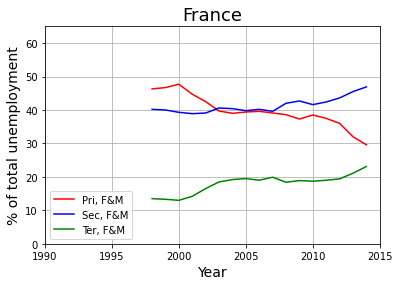

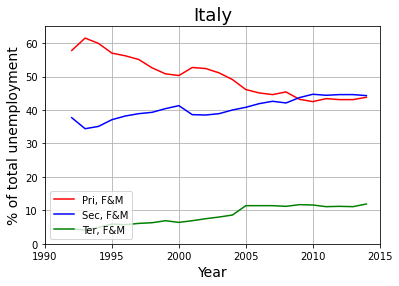

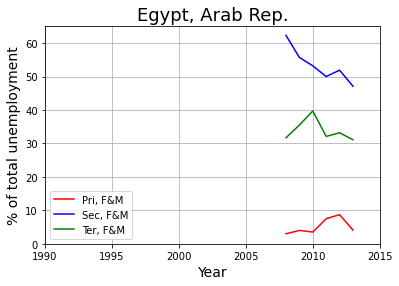

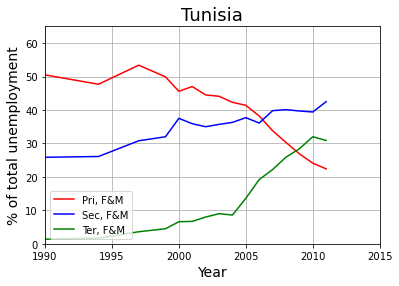

In [33]:
# Define the dictionnary for the legend
leg_short = ['Pri, F&M', 'Pri, F', 'Pri, M',
             'Sec, F&M', 'Sec, F', 'Sec, M',
             'Ter, F&M', 'Ter, F', 'Ter, M']
leg_dict = dict(zip(indicators_interest, leg_short))

# Define line styles for the 3 indicators
line_style = ['r', 'b', 'g']

# Prepare list for the countries and the indicators
country_list = countries_interest1 + countries_interest2
pos = 0 # positional index for slicing indicators_interest list
indicator_list = indicators_interest[pos:len(indicators_interest):3]

# Plotting the data
unemployment_plot(df, country_list, indicator_list, leg_dict, line_style)

### Observations:
**In France and Italy:**
1. Highly similar indicators
1. Population with *tertiary* education are less likely to be unemployed
1. However, from 2005 to 2015, the unemployment proportion of *tertiary* educated population tend to increase while the unemployment proportion of *primary* educated population tend to decrease. The unemployment proportion of people with *secondary* education remains nearly stable over time.

**In Tunisia:**
1. Similar trends as France and Italy are observed. However the amplitude of changes is larger.
1. From 2000 to 2015, the unemployment proportion of people with *tertiary* education has greatly increased (and to some extent the unemployment proportion of people with *seconday* education). Within the same period, the unemployment proportion of people with *primary* education has drastically decreased

**In Egypt:**
1. Less data is available (2008 to 2013)
1. Surprisingly, the sequence of the indicators is very different: the unemployment proportion of population with *secondary* education is the highest. But then it is followed by unemployment proportion of people with *tertiary* education. Finally, unemployment proportion of people with *primary* education is the lowest.

## 2. Exploring differences between male and female regarding Unemployment vs. Education
The indicators to plot are:
* *Unemployment with primary education, female (% of female unemployment)*
* *Unemployment with primary education, male (% of male unemployment)*

* *Unemployment with secondary education, female (% of female unemployment)*
* *Unemployment with secondary education, male (% of male unemployment)*

* *Unemployment with tertiary education, female (% of female unemployment)*
* *Unemployment with tertiary education, male (% of male unemployment)*

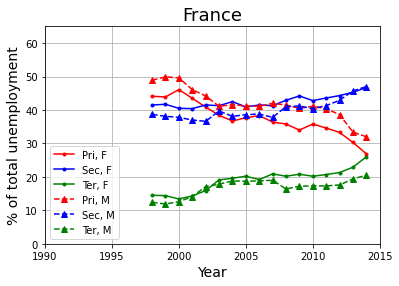

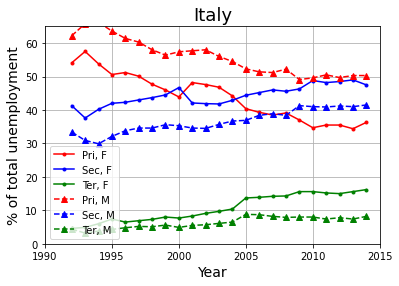

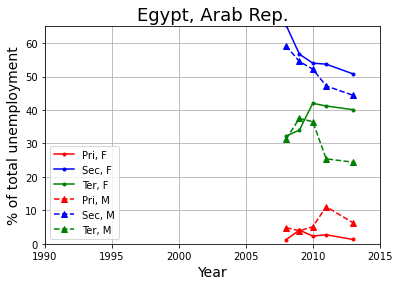

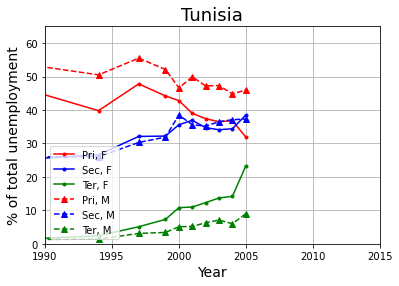

In [34]:
# Define line styles for the 6 indicators
line_style = ['r.-', 'b.-', 'g.-', 'r^--', 'b^--', 'g^--', ]

# Prepare list for the countries and the indicators
country_list = countries_interest1 + countries_interest2
pos = 1 # positional index for slicing indicators_interest list
indicator_list = indicators_interest[pos:len(indicators_interest):3] + indicators_interest[pos + 1:len(indicators_interest):3]

# Plotting the data
unemployment_plot(df, country_list, indicator_list, leg_dict, line_style)

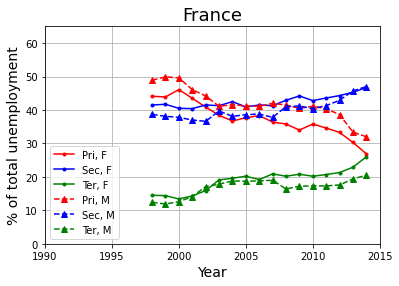

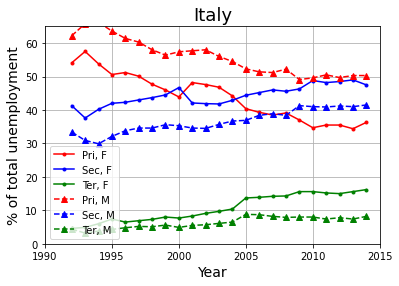

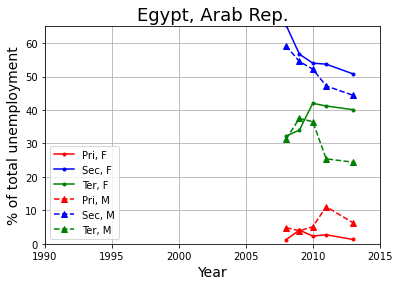

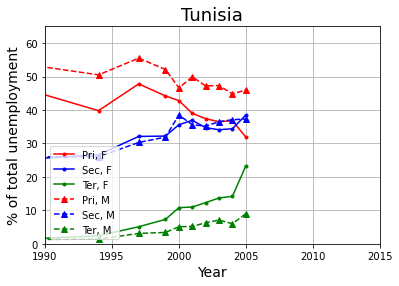

In [35]:
# Define line styles for the 6 indicators
line_style = ['r.-', 'b.-', 'g.-', 'r^--', 'b^--', 'g^--', ]

# Prepare list for the countries and the indicators
country_list = countries_interest1 + countries_interest2
pos = 1 # positional index for slicing indicators_interest list
indicator_list = indicators_interest[pos:len(indicators_interest):3] + indicators_interest[pos + 1:len(indicators_interest):3]

# Plotting the data
unemployment_plot(df, country_list, indicator_list, leg_dict, line_style)

### Observations:
In all countries:
1. Women with *secondary* or *tertiary* education are more affected by unemployment than men. Situation particularly visible for Italy and Tunisia
1. The situation is the opposite for *primary* educated population: in this population, higher proportion of men is affected by unemployment
1. In France, Italy and Tunisia, for *teriaty* educated population, the unemployment gap between male and female tend to increase